In [1]:
import numpy as np
import pandas as pd
import glob
import os  
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import seaborn as sns

import keras
from keras import initializers
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize

from keras import models
from keras.models import load_model
from keras.layers import Dropout
from keras.layers import BatchNormalization

from keras.optimizers import SGD, Adam, Adagrad, RMSprop, Adadelta, Nadam
from adabound import AdaBound
from group_norm import GroupNormalization

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils.np_utils import to_categorical

from PIL import Image, ImageFile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
path, dirs, files = next(os.walk(r"C:\\Users\\Tony\\Desktop\\Summer\\boat_classification\\data_aug2"))
dirs

['buoy',
 'cruise ship',
 'ferry boat',
 'freight boat',
 'gondola',
 'inflatable boat',
 'kayak',
 'paper boat',
 'sailboat']

In [3]:
class_label = ['buoy',
 'cruise ship',
 'ferry boat',
 'freight boat',
 'gondola',
 'inflatable boat',
 'kayak',
 'paper boat',
 'sailboat']

In [4]:
# Read in the augmented dataset
i = 0

X_data = []
Y_data = []

for boat in class_label:
    files = glob.glob (r"C:\\Users\\Tony\\Desktop\\Summer\\boat_classification\data_aug2\\" + str(boat) + "/*.jpg")
    
    for myFile in files:
      img = Image.open(myFile)
      #img.thumbnail((width, height), Image.ANTIALIAS) # resizes image in-place keeps ratio
      img = img.resize((128,128), Image.ANTIALIAS) # resizes image without ratio
      img = np.array(img)

      if img.shape == (128, 128, 3):
        # Add the numpy image to matrix with all data
        X_data.append (img)
        Y_data.append (i)
        
    i += 1

Total Number of Samples:  3852
Number of Samples per Class after Augmentation:
buoy : 402
cruise ship : 475
ferry boat : 398
freight boat : 345
gondola : 480
inflatable boat : 331
kayak : 502
paper boat : 432
sailboat : 487


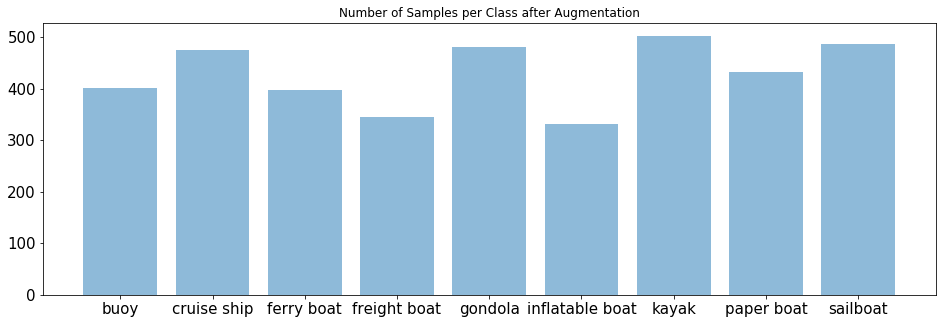

In [5]:
X = np.array(X_data)
Y = np.array(Y_data)
# Print shapes to see if they are correct
# print(X.shape)
# print(Y.shape)

number_classes = [0,0,0,0,0,0,0,0,0]

for i in range(len(Y)):
    if (Y[i] == 0):
        number_classes[0] += 1
    elif (Y[i] == 1):
        number_classes[1] += 1
    elif (Y[i] == 2):
        number_classes[2] += 1
    elif (Y[i] == 3):
        number_classes[3] += 1
    elif (Y[i] == 4):
        number_classes[4] += 1
    elif (Y[i] == 5):
        number_classes[5] += 1
    elif (Y[i] == 6):
        number_classes[6] += 1
    elif (Y[i] == 7):
        number_classes[7] += 1
    elif (Y[i] == 8):
        number_classes[8] += 1
    elif (Y[i] == 9):
        number_classes[9] += 1

print("Total Number of Samples: ", len(X))
print("Number of Samples per Class after Augmentation:")  

for i in range(len(class_label)):
     print(class_label[i], ":", number_classes[i])

objects = class_label
y_pos = np.arange(len(objects))
samples = number_classes

plt.figure(figsize=[16,5])
plt.bar(y_pos, samples, align='center', alpha=0.5)
plt.xticks(y_pos, objects, size=15)
plt.yticks(size=15)
plt.title('Number of Samples per Class after Augmentation')

plt.show()

In [6]:
# Normalizing the Data
# y = (x - x.min) / (x.max - x.min)

x_min = X.min(axis=(1, 2), keepdims=True)
x_max = X.max(axis=(1, 2), keepdims=True)
X = (X-x_min) / (x_max-x_min)

In [7]:
validation_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

train_datagen = ImageDataGenerator(
#         rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
#         fill_mode='nearest',
#         featurewise_center=True,
#         featurewise_std_normalization=True,
#         zca_whitening=True, 
#         zca_epsilon=1e-06
        )

In [8]:
y_cat = to_categorical(Y_data, len(class_label))

In [9]:
model = Sequential()
model.add(Conv2D(128, (5, 5), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(GroupNormalization(groups=32, axis=-1))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(GroupNormalization(groups=32, axis=-1))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(GroupNormalization(groups=32, axis=-1))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, kernel_initializer=initializers.glorot_uniform(seed=0), activation='relu'))
model.add(Dense(9, kernel_initializer=initializers.glorot_uniform(seed=0), activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 128)     9728      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        18464     
__________

In [10]:
model.compile(optimizer=Adagrad(lr=0.01, epsilon=1e-08, decay=0.0), 
              loss='categorical_crossentropy', metrics=['acc'])

In [11]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y_cat, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.2)

X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

Number of Samples Train:  3081
Number of Samples Validation:  616
Number of Samples Test:  155


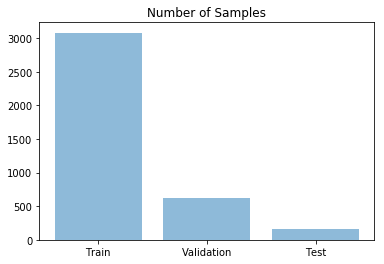

In [12]:
objects = ('Train', 'Validation', 'Test')
y_pos = np.arange(len(objects))
samples = []

samples.append(len(X_train))
samples.append(len(X_val))
samples.append(len(X_test))

print("Number of Samples Train: ", samples[0]) 
print("Number of Samples Validation: ", samples[1]) 
print("Number of Samples Test: ", samples[2]) 

plt.bar(y_pos, samples, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Number of Samples')

plt.show()

In [13]:
train_datagen.fit(X_train)
validation_datagen.fit(X_val)
test_datagen.fit(X_test)

train_generator = train_datagen.flow(X_train, y_train, batch_size=64)
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=64)
test_generator = test_datagen.flow(X_test, y_test, batch_size=64)

In [14]:
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 5.0
    if (epoch == 20):
        lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
        return lrate
    elif (epoch == 25):
        lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
        return lrate
    elif (epoch == 30):
        lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
        return lrate
    else:
        lrate = initial_lrate
        return lrate

In [15]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
       self.losses.append(logs.get('loss'))
       self.lr.append(step_decay(len(self.losses)))

In [16]:
import math
from keras.callbacks import LearningRateScheduler

loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]

history = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=2*(len(X_train) // 64),
    epochs=40, 
    validation_steps=10,
    validation_data=validation_generator, 
    callbacks=callbacks_list,
    verbose=1 )

model.save('model_Adagrad_Decay2_40_Epoch.h5')

Epoch 1/40
96/96 [==============================] - 33s 339ms/step - loss: 7.8640 - acc: 0.1875 - val_loss: 2.4713 - val_acc: 0.1640
Epoch 2/40
96/96 [==============================] - 20s 205ms/step - loss: 2.6010 - acc: 0.2532 - val_loss: 2.7160 - val_acc: 0.1364
Epoch 3/40
96/96 [==============================] - 20s 211ms/step - loss: 1.8460 - acc: 0.3277 - val_loss: 1.8973 - val_acc: 0.2841
Epoch 4/40
96/96 [==============================] - 20s 212ms/step - loss: 1.6743 - acc: 0.3969 - val_loss: 1.7239 - val_acc: 0.3945
Epoch 5/40
96/96 [==============================] - 20s 213ms/step - loss: 1.5673 - acc: 0.4399 - val_loss: 1.6657 - val_acc: 0.4107
Epoch 6/40
96/96 [==============================] - 20s 211ms/step - loss: 1.4593 - acc: 0.4816 - val_loss: 1.5406 - val_acc: 0.4643
Epoch 7/40
96/96 [==============================] - 21s 215ms/step - loss: 1.4369 - acc: 0.4951 - val_loss: 1.7843 - val_acc: 0.4675
Epoch 8/40
96/96 [==============================] - 20s 212ms/step - 

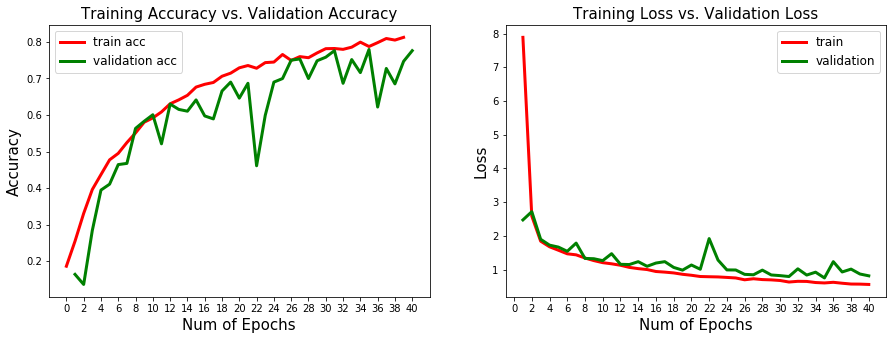

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 5))
  
# summarize history for accuracy
plt.subplot(1, 2 ,1)
plt.plot(np.arange(0, len(history.history['acc'])), acc, 'r', linewidth=3)
plt.plot(np.arange(1, len(history.history['val_acc'])+1), val_acc, 'g', linewidth=3)
plt.xticks(np.arange(0, 40+1, 2))
plt.title('Training Accuracy vs. Validation Accuracy', fontsize = 15)
plt.xlabel('Num of Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend(['train acc', 'validation acc', 'train loss', 'validation loss'], loc='best', fontsize='large')
  
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(history.history['loss'])+1), history.history['loss'], 'r', linewidth=3)
plt.plot(np.arange(1, len(history.history['val_loss'])+1), history.history['val_loss'], 'g', linewidth=3)
plt.xticks(np.arange(0, 40+1, 2))
plt.title('Training Loss vs. Validation Loss', fontsize = 15)
plt.xlabel('Num of Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(['train', 'validation'], loc='best', fontsize='large')
  
plt.show()

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

for i in range(len(acc)):
    acc[i] = '{:.4}'.format(acc[i])
    val_acc[i] = '{:.4}'.format(val_acc[i])
    loss[i] = '{:.4}'.format(loss[i])
    val_loss[i] = '{:.4}'.format(val_loss[i])
    
d = {'acc': acc, 'val_acc': val_acc, 
     'loss': loss, 'val_loss': val_loss}
df = pd.DataFrame(data=d)
print(df)

# print("acc \t\t val_acc \t loss \t val_loss")
# print("------------------------------------------------------------------")

# for i in range(len(acc)):
#     print('{:.4}'.format(acc[i]), " \t", '{:.4}'.format(val_acc[i]), "\t", 
#           '{:.4}'.format(loss[i]), "\t", '{:.4}'.format(val_loss[i]))

       acc val_acc    loss val_loss
0   0.1862   0.164   7.886    2.471
1   0.2547  0.1364   2.586    2.716
2   0.3306  0.2841   1.841    1.897
3   0.3961  0.3945   1.675    1.724
4   0.4369  0.4107   1.572    1.666
5   0.4773  0.4643   1.467    1.541
6    0.495  0.4675   1.436    1.784
7   0.5245  0.5633   1.342     1.33
8   0.5509  0.5828   1.265    1.321
9   0.5802  0.6006   1.204    1.264
10   0.592  0.5211    1.17     1.47
11  0.6084  0.6299   1.127    1.155
12  0.6306  0.6153   1.064    1.148
13  0.6414  0.6104   1.027    1.234
14  0.6538  0.6412     1.0    1.097
15  0.6763  0.5974  0.9418    1.193
16   0.684  0.5893  0.9234    1.234
17  0.6889  0.6656  0.8996    1.063
18   0.706  0.6899  0.8587   0.9821
19  0.7145  0.6461  0.8301    1.134
20   0.729  0.6867  0.7931    1.008
21  0.7353   0.461  0.7864    1.918
22  0.7279   0.599  0.7808    1.281
23  0.7433  0.6899  0.7662    0.989
24  0.7448  0.6997  0.7504   0.9864
25  0.7655    0.75  0.6959   0.8573
26  0.7493  0.7532  0.7265  

In [19]:
y_img_batch, y_class_batch = test_generator[0] 

for i in range(1,len(test_generator)):
    testX = test_generator[i][0]
    testY = test_generator[i][1]
    y_img_batch = np.concatenate((y_img_batch, testX))
    y_class_batch = np.concatenate((y_class_batch, testY))

y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)

Incorrect Predictions: 


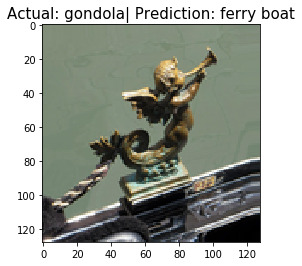

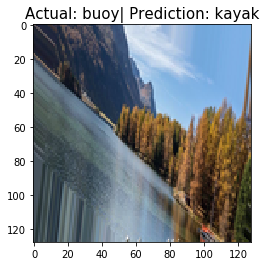

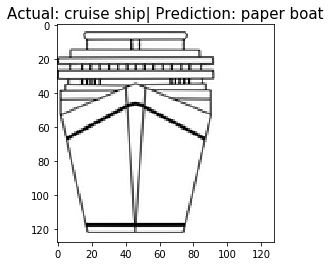

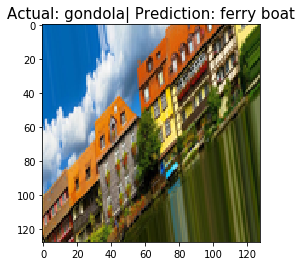

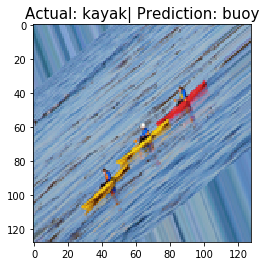

Correct Predictions: 


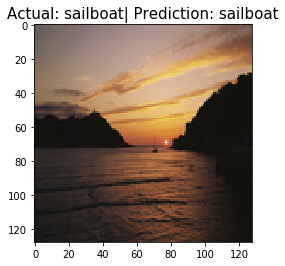

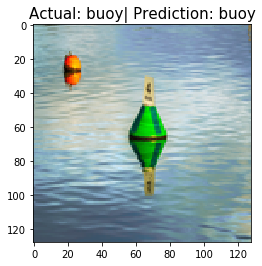

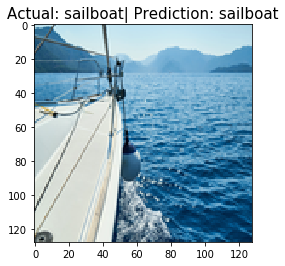

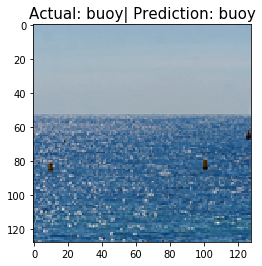

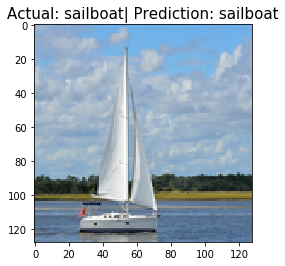

In [20]:
# for i in range(100):
#     plt.imshow((y_img_batch[i]*255))
#     actual_label = class_label[y_true[i]]
#     predict_label = class_label[y_pred[i]]
#     plt.title("Actual: " + actual_label + "| Prediction: " + predict_label, fontsize = 15)
#     plt.show()

counterC = 0
counterI = 0
i = 10
print('Incorrect Predictions: ')
while counterI < 5:
    actual_label = class_label[y_true[i]]
    predict_label = class_label[y_pred[i]]
    if (actual_label != predict_label):
        plt.imshow((y_img_batch[i]*255))
        plt.title("Actual: " + actual_label + "| Prediction: " + predict_label, fontsize = 15)
        plt.show()
        counterI+=1
        i+=1
    else:
        i+=1
     
print('Correct Predictions: ')
while counterC < 5:
    actual_label = class_label[y_true[i]]
    predict_label = class_label[y_pred[i]]
    if (actual_label == predict_label):
        plt.imshow((y_img_batch[i]*255))
        plt.title("Actual: " + actual_label + "| Prediction: " + predict_label, fontsize = 15)
        plt.show()
        counterC+=1
        i+=1
    else:
        i+=1

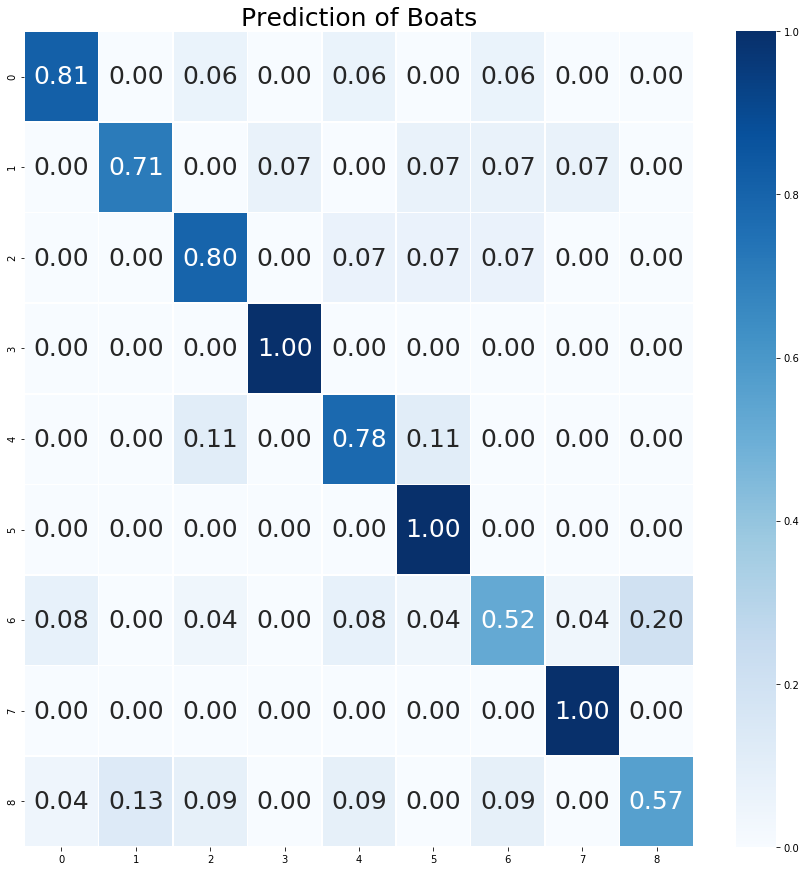

In [21]:
cm = confusion_matrix(y_true, y_pred) 
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(15,15))
plt.title('Prediction of Boats', fontsize = 25)
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, cmap="Blues", annot_kws={"size": 25})

In [22]:
print(classification_report(y_true, y_pred, target_names=class_label))

                 precision    recall  f1-score   support

           buoy       0.81      0.81      0.81        16
    cruise ship       0.77      0.71      0.74        14
     ferry boat       0.67      0.80      0.73        15
   freight boat       0.89      1.00      0.94         8
        gondola       0.70      0.78      0.74        18
inflatable boat       0.76      1.00      0.86        16
          kayak       0.72      0.52      0.60        25
     paper boat       0.91      1.00      0.95        20
       sailboat       0.72      0.57      0.63        23

       accuracy                           0.77       155
      macro avg       0.77      0.80      0.78       155
   weighted avg       0.76      0.77      0.76       155



In [23]:
from sklearn import preprocessing
from scipy import interp
from itertools import cycle

n_classes = len(class_label)
lb = preprocessing.LabelBinarizer()
lb.fit(y_test)
y_true = lb.transform(y_true)
y_pred = lb.transform(y_pred)

lw = 5

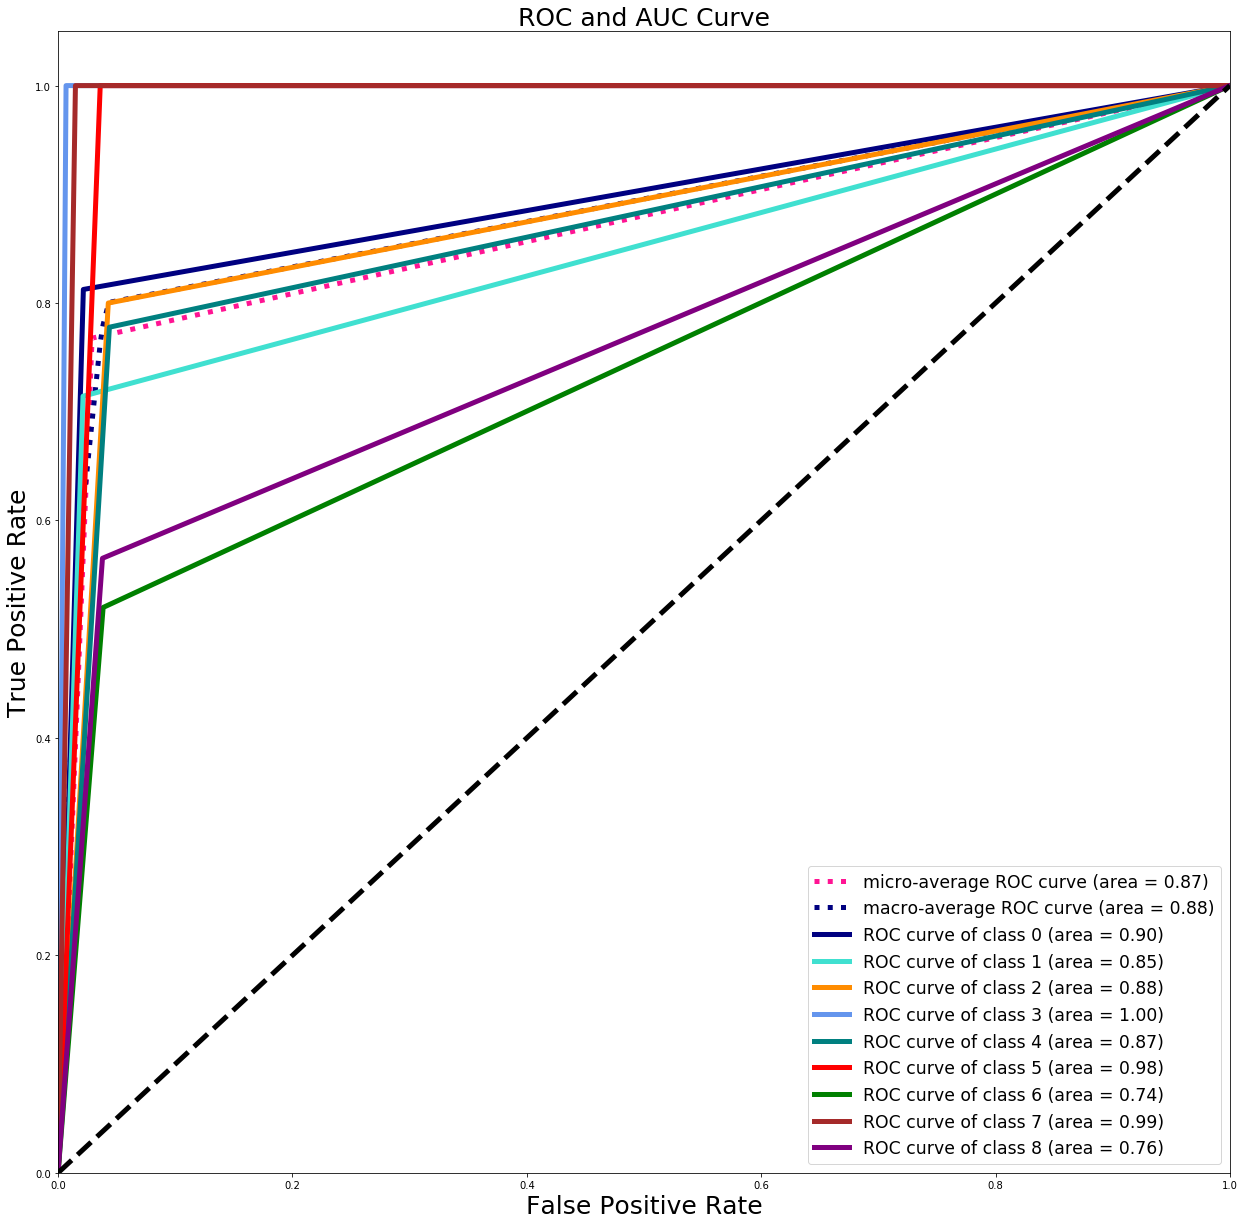

ROC_AUC_Score: 0.884796650291664


In [24]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    
#     # Plot of a ROC curve for a specific class
#     for i in range(n_classes):
#         plt.figure(figsize=(15,15))
#         plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
#         plt.plot([0, 1], [0, 1], 'k--')
#         plt.xlim([0.0, 1.0])
#         plt.ylim([0.0, 1.05])
#         plt.xlabel('False Positive Rate')
#         plt.ylabel('True Positive Rate')
#         plt.title('Receiver operating characteristic example')
#         plt.legend(loc="lower right")
#         plt.show()


    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(21,21))
    plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=lw)

    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=lw)

    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'green', 'brown', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
            label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 25)
    plt.ylabel('True Positive Rate', fontsize = 25)
    plt.title('ROC and AUC Curve', fontsize = 25)
    plt.legend(loc="lower right",fontsize='xx-large')
    plt.show()
        
    return roc_auc_score(y_test, y_pred, average=average)

print("ROC_AUC_Score:", multiclass_roc_auc_score(y_true, y_pred))

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
    
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true[:, i],
                                                        y_pred[:, i])
    average_precision[i] = average_precision_score(y_true[:, i], y_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_true.ravel(),
    y_pred.ravel())
average_precision["micro"] = average_precision_score(y_true, y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.4f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.6152


Text(0.5,1,'Average precision score, micro-averaged over all classes: AP=0.6152')

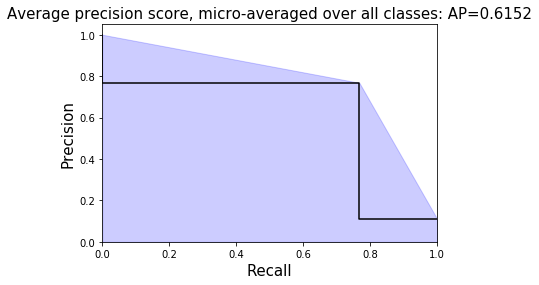

In [26]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='black', alpha=1.0,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='blue')#,
                 #**step_kwargs)

plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize = 15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.4f}'
    .format(average_precision["micro"]), fontsize = 15)

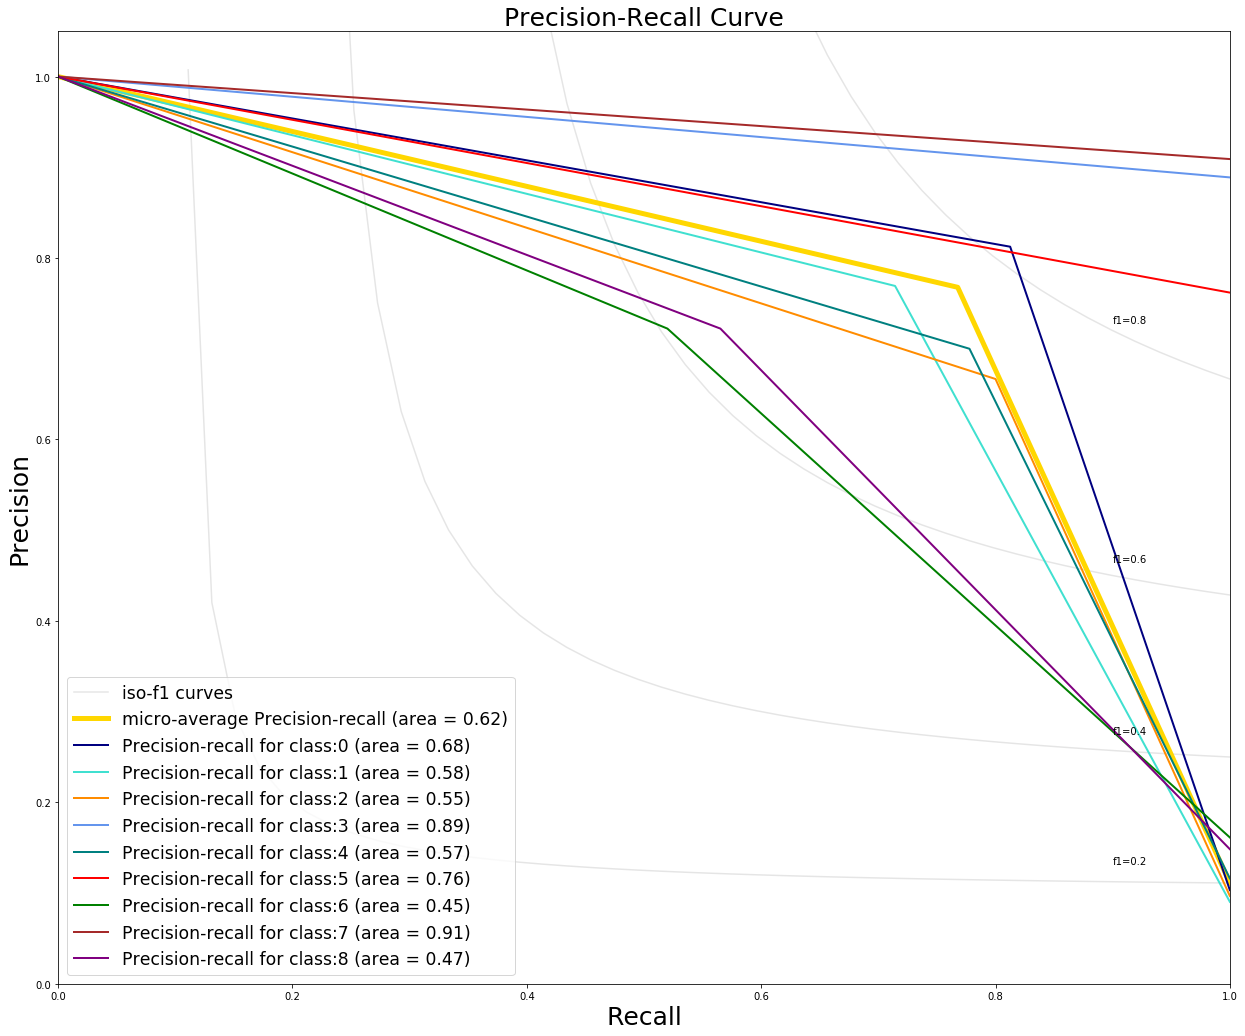

In [27]:
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'green', 'brown', 'purple'])

plt.figure(figsize=(21, 21))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=lw)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class:{0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize = 25)
plt.ylabel('Precision', fontsize = 25)
plt.title('Precision-Recall Curve', fontsize = 25)
plt.legend(lines, labels, loc='lower left', fontsize='xx-large')


plt.show()